<a href="https://colab.research.google.com/github/bhuiyanmobasshir94/MultiCoNER/blob/main/notebooks/dataset_PCA_overlapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df_alvi = pd.read_excel('/content/drive/MyDrive/raw_data_sent_of_ner_bn/alvi.xlsx')
df_karim = pd.read_excel('/content/drive/MyDrive/raw_data_sent_of_ner_bn/karim.xlsx')[:20000]
df_rifat = pd.read_excel('/content/drive/MyDrive/raw_data_sent_of_ner_bn/rifat.xlsx')
df_test = pd.read_excel('/content/drive/MyDrive/raw_data_sent_of_ner_bn/test.xlsx')

In [3]:
# df = pd.concat([df_alvi,df_test])

In [4]:
def pca_dataset(df):
  documents = df.Data.values.astype(str)
  X = CountVectorizer().fit_transform(documents).todense()
  pca = PCA(n_components=2).fit(X)
  data2D = pca.transform(X)
  return data2D

In [5]:
df_alvi_pca = pca_dataset(df_alvi)
df_karim_pca = pca_dataset(df_karim)
df_rifat_pca = pca_dataset(df_rifat)
df_test_pca = pca_dataset(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [10]:
def kmeans_dataset(df):
  documents = df.Data.values.astype(str)
  X = CountVectorizer().fit_transform(documents).todense()
  pca = PCA(n_components=2).fit(X)
  kmeans = KMeans(n_clusters=2).fit(X)
  centers2D = pca.transform(kmeans.cluster_centers_)
  return centers2D

In [11]:
df_alvi_kmns = kmeans_dataset(df_alvi)
df_karim_kmns = kmeans_dataset(df_karim)
df_rifat_kmns = kmeans_dataset(df_rifat)
df_test_kmns = kmeans_dataset(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

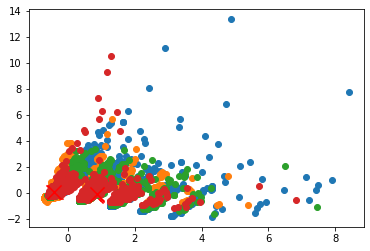

In [12]:
plt.scatter(df_alvi_pca[:,0], df_alvi_pca[:,1])
plt.scatter(df_alvi_kmns[:,0], df_alvi_kmns[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.scatter(df_karim_pca[:,0], df_karim_pca[:,1])
plt.scatter(df_karim_kmns[:,0], df_karim_kmns[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.scatter(df_rifat_pca[:,0], df_rifat_pca[:,1])
plt.scatter(df_rifat_kmns[:,0], df_rifat_kmns[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.scatter(df_test_pca[:,0], df_test_pca[:,1])
plt.scatter(df_test_kmns[:,0], df_test_kmns[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.show()